# Coursework 1
## Part 1. Describe the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
DATA_PATH = "./Data"

In [3]:
df_dict = {}

for file_ in os.listdir(DATA_PATH):
    df_dict[file_] = pd.read_csv(os.path.join(DATA_PATH, file_))
    
df_dict["progresses.csv"].columns = ["progress_id", "student_id", "course_id"]

df_dict["students.csv"].columns = ['id_', 'student_id', 'city', 'birthday']
df_dict["students.csv"]["birthday"] = pd.to_datetime(df_dict["students.csv"]["birthday"], errors="coerce")

df_dict["courses.csv"].columns = ["index", "course_id", "course_title", "course_field"]
df_dict["courses.csv"].set_index("index", inplace=True)

dataset = pd.merge(left=df_dict["progresses.csv"],
                   right=df_dict["progress_phases.csv"],
                   on="progress_id",
                   how="outer")

dataset = pd.merge(left=dataset,
                   right=df_dict["courses.csv"],
                   on="course_id",
                   how="outer")

dataset = pd.merge(left=dataset,
                   right=df_dict["course_contents.csv"],
                   on=["course_id", "lesson_number", "module_number"],
                   how="outer")

dataset["start_date"] = (
    pd.to_datetime(dataset["start_date"], errors="coerce", utc=False)
    .dt.tz_localize(None)
    )

dataset["finish_date"] = (
    pd.to_datetime(dataset["finish_date"], errors="coerce", utc=False)
    .dt.tz_localize(None)
    )

dset_students = df_dict["students.csv"].copy(deep=True)

print("Main dataset:", dataset.dtypes, dataset.columns, sep="\n", end="\n\n")
print("Student dataset:", dset_students.dtypes, dset_students.columns, sep="\n")

Main dataset:
progress_id              object
student_id               object
course_id                object
module_number           float64
lesson_number           float64
status                   object
start_date       datetime64[ns]
finish_date      datetime64[ns]
course_title             object
course_field             object
module_title             object
lesson_title             object
lesson_token             object
is_video                 object
is_homework              object
dtype: object
Index(['progress_id', 'student_id', 'course_id', 'module_number',
       'lesson_number', 'status', 'start_date', 'finish_date', 'course_title',
       'course_field', 'module_title', 'lesson_title', 'lesson_token',
       'is_video', 'is_homework'],
      dtype='object')

Student dataset:
id_                    int64
student_id            object
city                  object
birthday      datetime64[ns]
dtype: object
Index(['id_', 'student_id', 'city', 'birthday'], dtype='object')


### Total number of courses

In [4]:
dataset["course_id"].nunique()

15

### Number of modules in each course

In [5]:
(
    dataset.groupby("course_title")
            .nunique()
            ["module_number"]
)

course_title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

### Number of lessons in each module

`Question`: how to display properly

In [6]:
pd.DataFrame(
    dataset.groupby(["course_title", "module_number"])
            .nunique()
            ["lesson_number"]
)

lesson_number
course_title                  module_number               
Excel Базовый                 1.0                       11
                              2.0                        7
                              3.0                        3
                              4.0                        7
                              5.0                        5
...                                                    ...
Руководитель digital-проектов 13.0                       4
                              14.0                       7
                              15.0                      12
                              16.0                       8
                              17.0                       4

[229 rows x 1 columns]

### Median number of lessons in module
`Doto`: write an explanation what the f is going on here

In [7]:
output_list = []

for course_title_, nunique_df in dataset.groupby(["course_title", "module_number"]).nunique().groupby(level=0):
    output_list.append([course_title_, nunique_df["lesson_number"].median()])

pd.DataFrame(output_list, columns=["course title", "median lesson count in module"])

,course title,median lesson count in module
0,Excel Базовый,5.0
1,Java-разработчик,7.0
2,Java-разработчик c нуля,13.0
3,JavaScript с нуля,7.0
4,PHP-разработчик с 0 до PRO. Часть 1,4.0
5,SMM-маркетолог от А до Я,6.0
6,UX-дизайн,3.5
7,Анимация интерфейсов,3.0
8,Веб-вёрстка для начинающих 2.0,7.0
9,Веб-дизайн PRO 2.0,5.0


### Number of students in each course

In [8]:
(
    dataset.groupby("course_title")
            .nunique()
            ["student_id"]
)

course_title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                511
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

### Minimum, maximum, mean, median age of students
`Doto`: formulate the task
1. Plot the distribution and find outliers
2. Clamp

Min: 1921-01-01 00:00:00 | Max: 2020-01-01 00:00:00


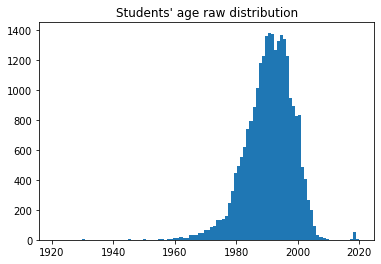

In [13]:
# value distribution

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print("Min:", dset_students["birthday"].min(), "| Max:", dset_students["birthday"].max())

fig, ax = plt.subplots()

ax.hist(dset_students["birthday"].dropna(), bins=100)
ax.set_title("Students' age raw distribution")
plt.show()

Min: 1921-01-01 00:00:00 | Max: 2020-01-01 00:00:00


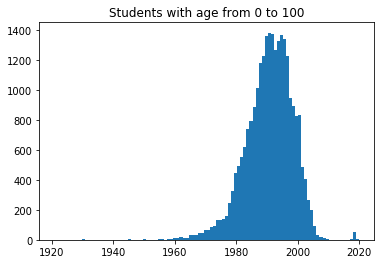

In [12]:
# Clamp

bad_dates_mask = (dset_students["birthday"] > np.datetime64(str(2021))) | (
                dset_students["birthday"] < np.datetime64(str(2021-100)))

dset_students.loc[bad_dates_mask] = pd.NaT


# Check

print("Min:", dset_students["birthday"].min(), "| Max:", dset_students["birthday"].max())

fig, ax = plt.subplots()

ax.hist(dset_students["birthday"].dropna(), bins=100)
ax.set_title("Students with age from 0 to 100")
plt.show()